# 20152410 배형준 머신러닝 과제4

In [1]:
# library import

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 1. Plot the estimated parameters using the training dataset

In [2]:
# set my local working directory

import os

directory = 'C:\\Users\\golds\\Desktop\\중앙대학교\\2020-1 4학년 1학기\\머신러닝'
os.chdir(directory)

In [3]:
# load trainset and testset

train_directory = './과제4/data_train.csv'
test_directory = './과제4/data_test.csv'

train = pd.read_csv(train_directory, header=None)
test = pd.read_csv(test_directory, header=None)

column_name = ['x', 'y', 'z', 'h']
train.columns = column_name
test.columns = column_name

X_train = train.iloc[:, 0:3]
X_test = test.iloc[:, 0:3]
Y_train = train.iloc[:, 3]
Y_test = test.iloc[:, 3]

In [4]:
train.head()

,x,y,z,h
0,0.273548,-8.932102,18.708684,73.578825
1,5.403327,4.782977,-18.762210,-56.410433
2,0.029941,-3.245916,6.932498,52.390768
3,3.047974,0.715211,-1.965419,-6.936295
4,1.302074,-5.871807,-15.702181,-34.997017


In [5]:
test.head()

,x,y,z,h
0,-1.788894,-2.717927,-4.425695,-14.055818
1,2.958174,4.515505,6.644435,20.504905
2,-0.569490,10.096246,-13.270292,-73.843148
3,4.279318,2.747878,-5.857125,-24.644937
4,0.125975,-4.349421,5.777460,31.934657


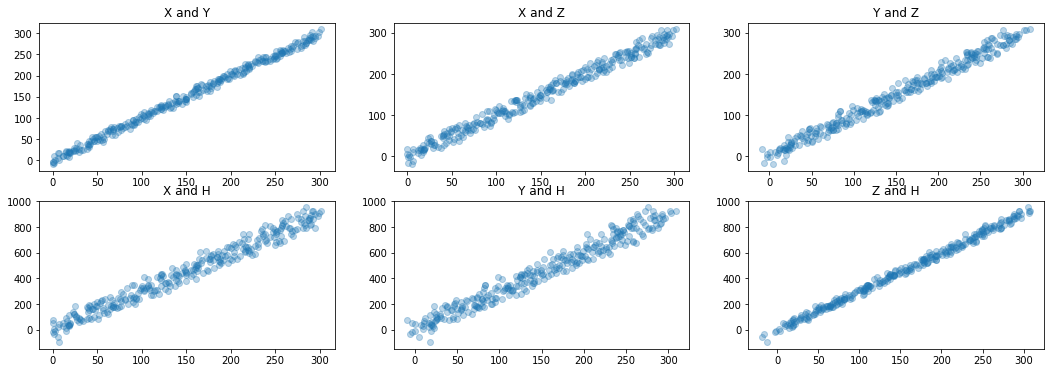

In [6]:
# 변수들이 어떤 상관관계를 가지고 있는지 체크

plt.figure(figsize=(18, 6))
plt.subplot(231)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.title('X and Y')
plt.subplot(232)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 2], alpha=0.3)
plt.title('X and Z')
plt.subplot(233)
plt.scatter(X_train.iloc[:, 1], X_train.iloc[:, 2], alpha=0.3)
plt.title('Y and Z')
plt.subplot(234)
plt.scatter(X_train.iloc[:, 0], Y_train, alpha=0.3)
plt.title('X and H')
plt.subplot(235)
plt.scatter(X_train.iloc[:, 1], Y_train, alpha=0.3)
plt.title('Y and H')
plt.subplot(236)
plt.scatter(X_train.iloc[:, 2], Y_train, alpha=0.3)
plt.title('Z and H')
plt.show()

In [7]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

# 위에 scatter plot에서도 확인했듯이 변수간의 선형 상관관계가 0.98 이상으로 매우 강한 것을 알 수 있다.

,x,y,z,h
x,1,0.997343,0.991728,0.984305
y,0.997343,1,0.990663,0.980638
z,0.991728,0.990663,1,0.997004
h,0.984305,0.980638,0.997004,1


In [8]:
def make_regression(X_train, Y_train, X_test, Y_test):
    
    # set random initial condition of parameters
    
    m = len(Y_train)
    n = len(Y_test)
    X_train = np.hstack((np.ones((m, 1)), np.array(X_train)))
    X_test = np.hstack((np.ones((n, 1)), np.array(X_test)))
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)
    
    initial_theta = np.random.randn(4, 1)
    record_theta = initial_theta.T
    
    initial_train_loss = (Y_train - X_train.dot(initial_theta)).T.dot(Y_train - X_train.dot(initial_theta)) / (2*m)
    initial_test_loss = (Y_test - X_test.dot(initial_theta)).T.dot(Y_test - X_test.dot(initial_theta)) / (2*n)
    
    list_train_loss = [float(initial_train_loss)]
    list_test_loss = [float(initial_test_loss)]

    temp_theta = initial_theta
    temp_train_loss = initial_train_loss
    
    learning_rate = 10**(-6)
    error_bound = 10**(-5)

    # model learning

    while True:
        # calculate gradient
        gradient_theta = (X_train.T.dot(X_train).dot(temp_theta) - X_train.T.dot(Y_train)) / m
    
        # renew the parameters
        next_theta = temp_theta - learning_rate * gradient_theta
        temp_theta = next_theta
    
        # calculate loss to evaluate the parameters
        next_train_loss = (Y_train - X_train.dot(next_theta)).T.dot(Y_train - X_train.dot(next_theta)) / (2*m)
        test_loss = (Y_test - X_test.dot(next_theta)).T.dot(Y_test - X_test.dot(next_theta)) / (2*n)
    
        # store results
        record_theta = np.vstack((record_theta, temp_theta.T))
        list_train_loss.append(float(next_train_loss))
        list_test_loss.append(float(test_loss))
        
        # stopping rule
        if len(list_train_loss) > 100000:
            if temp_train_loss > next_train_loss and temp_train_loss - next_train_loss < error_bound:
                break
                
        temp_train_loss = next_train_loss
    
    result_theta = record_theta[-1, :]
    
    return result_theta, record_theta, list_train_loss, list_test_loss

In [9]:
result_theta, record_theta, list_train_loss, list_test_loss = make_regression(X_train, Y_train, X_test, Y_test)

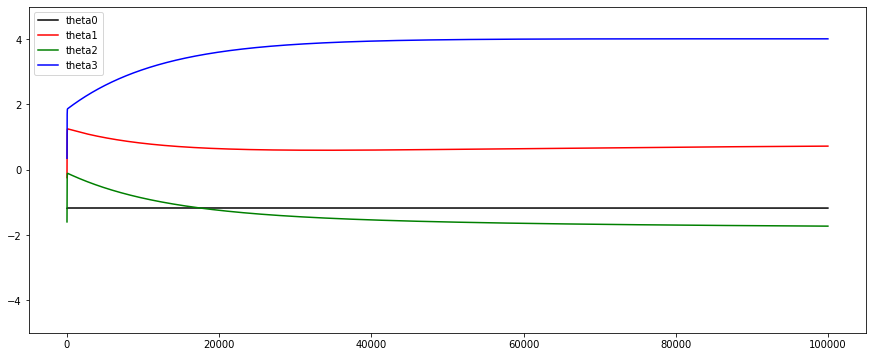

In [10]:
# plot of theta0 ~ theta3

plt.figure(figsize=(15, 6))
plt.plot(record_theta[:, 0], 'k', label='theta0')
plt.plot(record_theta[:, 1], 'r', label='theta1')
plt.plot(record_theta[:, 2], 'g', label='theta2')
plt.plot(record_theta[:, 3], 'b', label='theta3')
plt.legend(loc='best')
plt.ylim((-5, 5))
plt.show()

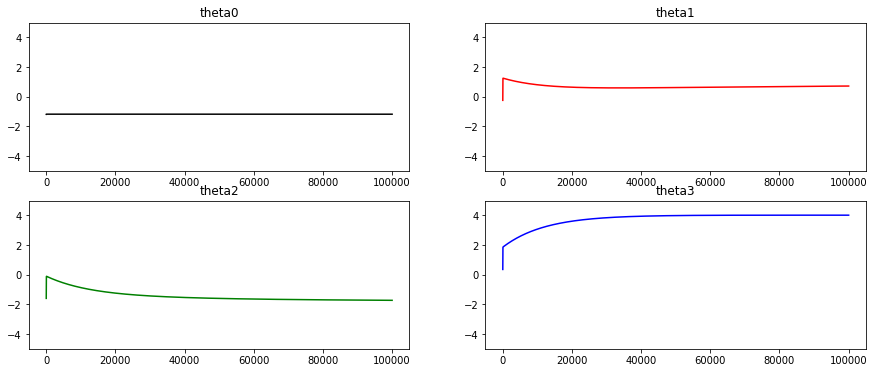

In [11]:
# 그래프가 겹치는 것을 고려하여 각각 출력

plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.plot(record_theta[:, 0], 'k', label='theta0')
plt.title('theta0')
plt.ylim((-5, 5))
plt.subplot(222)
plt.plot(record_theta[:, 1], 'r', label='theta1')
plt.title('theta1')
plt.ylim((-5, 5))
plt.subplot(223)
plt.plot(record_theta[:, 2], 'g', label='theta2')
plt.title('theta2')
plt.ylim((-5, 5))
plt.subplot(224)
plt.plot(record_theta[:, 3], 'b', label='theta3')
plt.title('theta3')
plt.ylim((-5, 5))
plt.show()

# 2. Plot the training error using the training dataset

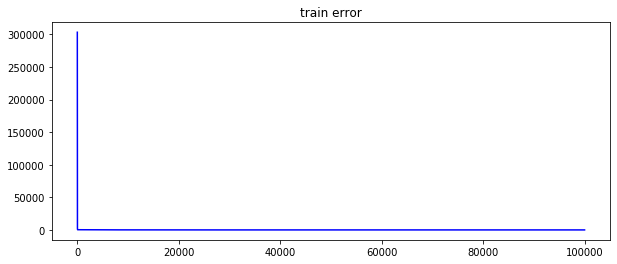

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(list_train_loss, 'b')
plt.title('train error')
plt.show()

In [13]:
print('학습은 {}번 반복했고 최종 train error는 {}이다.'.format(len(list_train_loss), list_train_loss[-1]))

학습은 100001번 반복했고 최종 train error는 103.54263922423162이다.


# 3. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence

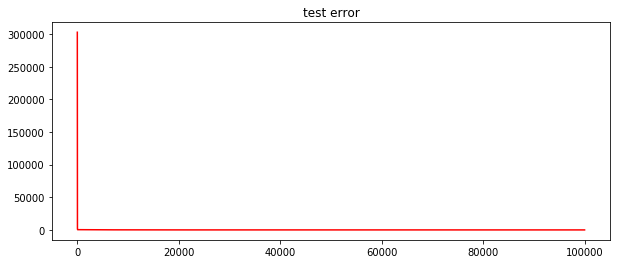

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(list_test_loss, 'r')
plt.title('test error')
plt.show()

# 정규방정식의 결과와 경사하강법의 결과 비교

In [15]:
x_train = np.hstack((np.ones((len(Y_train), 1)), X_train))
x_test = np.hstack((np.ones((len(Y_test), 1)), X_test))

theta_hat_ne = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(Y_train)
train_loss_ne = (Y_train - x_train.dot(theta_hat_ne)).T.dot(Y_train - x_train.dot(theta_hat_ne)) / (2*len(Y_train))
test_loss_ne = (Y_test - x_test.dot(theta_hat_ne)).T.dot(Y_test - x_test.dot(theta_hat_ne)) / (2*len(Y_test))

print(' 정규방정식으로 구한 theta_hat : {} \n 경사하강법으로 구한 theta_hat : {}'.format(theta_hat_ne, result_theta))

 정규방정식으로 구한 theta_hat : [-1.19220481  0.79285367 -1.7943636   4.00796887] 
 경사하강법으로 구한 theta_hat : [-1.17578396  0.72338209 -1.72980382  4.01287723]


In [16]:
sst = np.sum((Y_train - np.mean(Y_train))**2)
sse_ne = train_loss_ne * (2*len(Y_train))
sse_gd = list_train_loss[-1] * (2*len(Y_train))

In [17]:
print('train 데이터에 대한 R^2값으로 비교해보면 정규방정식의 R^2는 {}, 경사하강법의 R^2는 {}이다.'.format(1-sse_ne/sst, 1-sse_gd/sst))

train 데이터에 대한 R^2값으로 비교해보면 정규방정식의 R^2는 0.997008842198529, 경사하강법의 R^2는 0.997006275023071이다.


In [18]:
print('정규방정식의 test error는 {}이고 경사하강법의 test error는 {}이다.'.format(test_loss_ne, list_test_loss[-1]))

정규방정식의 test error는 0.9914725974039151이고 경사하강법의 test error는 1.593872259118747이다.


정규방정식과 경사하강법의 train error, test error가 크게 차이 나진 않는다. 하지만 이 데이터에 대해선 정규방정식의 결과가 아주 살짝 더 좋은 것을 확인할 수 있다.